## **Scrapping Data Tweet Vaksin**

In [ ]:
!pip install emoji
!pip install sastrawi
!pip install PySastrawi
!pip install preprocessor
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=98596b9c6d2f2ed4dcaebaa22ea392a70963b0f843008f3dc36928b3ed4fa6da
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4477 sha256=636b1c21350fe36785139f4b087674699b3d662a621c9f19645d204c

In [ ]:
import os
import pandas as pd
import tweepy
import string
from textblob import TextBlob
import preprocessor as p
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import sys
plt.style.use('fivethirtyeight')

In [ ]:
access_token="1554438750066814976-dztkowHmkPmkmjAYi9iD2G8BZA8Ji9"
access_token_secret="cxSPHGDurGSVrDjQXoF5F5TGkiBewTxi8DgCsPelIVpfN"
api_key="B9Ug5mSkiDUvH0RFjec521aEj"
api_key_secret="yfRzMtwekEAvgR3Pf8e5RWSCp8vVzk9roFGRw8nBOwgrLQNBWK"

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
def scraptweets(key_words):

  db_tweets = pd.DataFrame(columns=['tanggal', 'username', 'Tweet'])
  tweets = tweepy.Cursor(
      api.search, q=key_words, lang="id",
      tweet_mode='extended').items(10000)
  tweet_list= [tweet for tweet in tweets]

  for tweet in tweet_list:
    username = tweet.user.screen_name
    tanggal = tweet.created_at
    Tweet = tweet.full_text

    ith_tweet = [tanggal, username, Tweet]

    db_tweets.loc[len(db_tweets)] = ith_tweet
    print('Proses Scrapping selesai dengan jumlah data', len(db_tweets))
  filename = 'data_twitter.csv'
  db_tweets.to_csv(filename, index=False)

key_word = 'Vaksin -filter:retweets'

scraptweets(key_word)

Streaming output truncated to the last 5000 lines.
Proses Scrapping selesai dengan jumlah data 5001
Proses Scrapping selesai dengan jumlah data 5002
Proses Scrapping selesai dengan jumlah data 5003
Proses Scrapping selesai dengan jumlah data 5004
Proses Scrapping selesai dengan jumlah data 5005
Proses Scrapping selesai dengan jumlah data 5006
Proses Scrapping selesai dengan jumlah data 5007
Proses Scrapping selesai dengan jumlah data 5008
Proses Scrapping selesai dengan jumlah data 5009
Proses Scrapping selesai dengan jumlah data 5010
Proses Scrapping selesai dengan jumlah data 5011
Proses Scrapping selesai dengan jumlah data 5012
Proses Scrapping selesai dengan jumlah data 5013
Proses Scrapping selesai dengan jumlah data 5014
Proses Scrapping selesai dengan jumlah data 5015
Proses Scrapping selesai dengan jumlah data 5016
Proses Scrapping selesai dengan jumlah data 5017
Proses Scrapping selesai dengan jumlah data 5018
Proses Scrapping selesai dengan jumlah data 5019
Proses Scrapping s

## **Preprocessing Data**

### Cleansing Data

In [ ]:
def load_data():
  data = pd.read_csv('data_twitter.csv')
  return data

In [ ]:
df = load_data()

In [ ]:
df = pd.DataFrame(df[['tanggal','username', 'Tweet']])
df.head(10)

,tanggal,username,Tweet
0,2022-08-05 07:25:24,raveenaruna,@jevranthnx Sudah yang ketiga. Katanya nanti a...
1,2022-08-05 07:25:16,thishowo,@jidatjunhuii wkwkw makin banyak aja ini vaksi...
2,2022-08-05 07:25:06,ngokk78,#VaksinIndonesia \n𝐄𝐓𝐁𝐚𝐧𝐠𝐞𝐭\n\nVaksin covid-19...
3,2022-08-05 07:24:53,Aiid4a,@advnc00 Vaksin akan dipastikan aman 👌
4,2022-08-05 07:24:51,lapas_sragen,KAKANWIL KEMENKUMHAM JATENG A YUSPAHRUDDIN: 10...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster 🙂👍🏻
6,2022-08-05 07:24:28,ngokk78,#VaksinIndonesia \n𝐄𝐓𝐁𝐚𝐧𝐠𝐞𝐭\n\nDipastikan aman...
7,2022-08-05 07:24:08,amare_guzel,"""Dapatkah Anda bayangkan jika mereka menjual v..."
8,2022-08-05 07:24:04,MYusuf114,Uji klinis vaksin covid-19 bertujuan utk menge...
9,2022-08-05 07:24:03,shitpostmemz,"@demdimps @nurfaiq_azzamd CMIIW, tp coba cari ..."


In [ ]:
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
    text = re.sub(i, '', text)
  return text

In [ ]:
df['Tweet']= np.vectorize(remove_pattern)(df['Tweet'], " *RT | *@[\w]*")
df.head(20)

,tanggal,username,Tweet
0,2022-08-05 07:25:24,raveenaruna,Sudah yang ketiga. Katanya nanti ada vaksin k...
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin...
2,2022-08-05 07:25:06,ngokk78,#VaksinIndonesia \n𝐄𝐓𝐁𝐚𝐧𝐠𝐞𝐭\n\nVaksin covid-19...
3,2022-08-05 07:24:53,Aiid4a,Vaksin akan dipastikan aman 👌
4,2022-08-05 07:24:51,lapas_sragen,KAKANWIL KEMENKUMHAM JATENG A YUSPAHRUDDIN: 10...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster 🙂👍🏻
6,2022-08-05 07:24:28,ngokk78,#VaksinIndonesia \n𝐄𝐓𝐁𝐚𝐧𝐠𝐞𝐭\n\nDipastikan aman...
7,2022-08-05 07:24:08,amare_guzel,"""Dapatkah Anda bayangkan jika mereka menjual v..."
8,2022-08-05 07:24:04,MYusuf114,Uji klinis vaksin covid-19 bertujuan utk menge...
9,2022-08-05 07:24:03,shitpostmemz,"CMIIW, tp coba cari di Indo vaksin smallpox k..."


In [ ]:
def remove(text):
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
  return text

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: remove(x))
df.head(20)

,tanggal,username,Tweet
0,2022-08-05 07:25:24,raveenaruna,Sudah yang ketiga Katanya nanti ada vaksin kee...
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin
2,2022-08-05 07:25:06,ngokk78,VaksinIndonesia Vaksin covid 19 Indonesia sege...
3,2022-08-05 07:24:53,Aiid4a,Vaksin akan dipastikan aman
4,2022-08-05 07:24:51,lapas_sragen,KAKANWIL KEMENKUMHAM JATENG A YUSPAHRUDDIN 106...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster
6,2022-08-05 07:24:28,ngokk78,VaksinIndonesia Dipastikan aman uji klinis tah...
7,2022-08-05 07:24:08,amare_guzel,Dapatkah Anda bayangkan jika mereka menjual va...
8,2022-08-05 07:24:04,MYusuf114,Uji klinis vaksin covid 19 bertujuan utk menge...
9,2022-08-05 07:24:03,shitpostmemz,CMIIW tp coba cari di Indo vaksin smallpox krn...


In [ ]:
def hapus(tweet):
  tweet = re.sub(r'\$\w*','', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub('[0-9]+', '', tweet)

  return tweet

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: hapus(x))
df.head(20)

,tanggal,username,Tweet
0,2022-08-05 07:25:24,raveenaruna,Sudah yang ketiga Katanya nanti ada vaksin kee...
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin
2,2022-08-05 07:25:06,ngokk78,VaksinIndonesia Vaksin covid Indonesia segera...
3,2022-08-05 07:24:53,Aiid4a,Vaksin akan dipastikan aman
4,2022-08-05 07:24:51,lapas_sragen,KAKANWIL KEMENKUMHAM JATENG A YUSPAHRUDDIN WB...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster
6,2022-08-05 07:24:28,ngokk78,VaksinIndonesia Dipastikan aman uji klinis tah...
7,2022-08-05 07:24:08,amare_guzel,Dapatkah Anda bayangkan jika mereka menjual va...
8,2022-08-05 07:24:04,MYusuf114,Uji klinis vaksin covid bertujuan utk mengeva...
9,2022-08-05 07:24:03,shitpostmemz,CMIIW tp coba cari di Indo vaksin smallpox krn...


In [ ]:
df.drop_duplicates(subset="Tweet", keep= "first", inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

,tanggal,username,Tweet
0,2022-08-05 07:25:24,raveenaruna,Sudah yang ketiga Katanya nanti ada vaksin kee...
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin
2,2022-08-05 07:25:06,ngokk78,VaksinIndonesia Vaksin covid Indonesia segera...
3,2022-08-05 07:24:53,Aiid4a,Vaksin akan dipastikan aman
4,2022-08-05 07:24:51,lapas_sragen,KAKANWIL KEMENKUMHAM JATENG A YUSPAHRUDDIN WB...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster
6,2022-08-05 07:24:28,ngokk78,VaksinIndonesia Dipastikan aman uji klinis tah...
7,2022-08-05 07:24:08,amare_guzel,Dapatkah Anda bayangkan jika mereka menjual va...
8,2022-08-05 07:24:04,MYusuf114,Uji klinis vaksin covid bertujuan utk mengeva...
9,2022-08-05 07:24:03,shitpostmemz,CMIIW tp coba cari di Indo vaksin smallpox krn...


### Case Folding

In [ ]:
df['Tweet']=df['Tweet'].str.lower()
df.head(20)

,tanggal,username,Tweet
0,2022-08-05 07:25:24,raveenaruna,sudah yang ketiga katanya nanti ada vaksin kee...
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin
2,2022-08-05 07:25:06,ngokk78,vaksinindonesia vaksin covid indonesia segera...
3,2022-08-05 07:24:53,Aiid4a,vaksin akan dipastikan aman
4,2022-08-05 07:24:51,lapas_sragen,kakanwil kemenkumham jateng a yuspahruddin wb...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster
6,2022-08-05 07:24:28,ngokk78,vaksinindonesia dipastikan aman uji klinis tah...
7,2022-08-05 07:24:08,amare_guzel,dapatkah anda bayangkan jika mereka menjual va...
8,2022-08-05 07:24:04,MYusuf114,uji klinis vaksin covid bertujuan utk mengeva...
9,2022-08-05 07:24:03,shitpostmemz,cmiiw tp coba cari di indo vaksin smallpox krn...


### Stopwords Removal and Tokenization

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
file_stopwords = open('idStopwords.txt','r')
get_stopwords = file_stopwords.read()
stopwords_add = get_stopwords.split('\n')
file_stopwords.close()

stop_factory = StopWordRemoverFactory().get_stop_words()
data = stop_factory+stopwords_indonesia
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

factory = StemmerFactory()
stemmer = factory.create_stemmer()

from nltk.tokenize import TweetTokenizer

def CleanTweet(tweet):
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  tweet_token = tokenizer.tokenize(tweet)
  tweets_clean = []
  for word in tweet_token:
    if(word not in data and
       word not in stopwords_add and
       word not in string.punctuation):
      stem_word = stemmer.stem(word)
      tweets_clean.append(stem_word)
  return tweets_clean

df['TweetStop'] = df['Tweet'].apply(lambda x: CleanTweet(x))
df.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tanggal,username,Tweet,TweetStop
0,2022-08-05 07:25:24,raveenaruna,sudah yang ketiga katanya nanti ada vaksin kee...,"[tiga, vaksin, empat]"
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin,"[wkwkw, vaksin]"
2,2022-08-05 07:25:06,ngokk78,vaksinindonesia vaksin covid indonesia segera...,"[vaksinindonesia, vaksin, covid, indonesia, ri..."
3,2022-08-05 07:24:53,Aiid4a,vaksin akan dipastikan aman,"[vaksin, aman]"
4,2022-08-05 07:24:51,lapas_sragen,kakanwil kemenkumham jateng a yuspahruddin wb...,"[kakanwil, kemenkumham, jateng, yuspahruddin, ..."
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster,"[besok, vaksin, booster]"
6,2022-08-05 07:24:28,ngokk78,vaksinindonesia dipastikan aman uji klinis tah...,"[vaksinindonesia, aman, uji, klinis, tahap, va..."
7,2022-08-05 07:24:08,amare_guzel,dapatkah anda bayangkan jika mereka menjual va...,"[dapat, bayang, jual, vaksin, polio, vaksinasi..."
8,2022-08-05 07:24:04,MYusuf114,uji klinis vaksin covid bertujuan utk mengeva...,"[uji, klinis, vaksin, covid, tuju, utk, evalua..."
9,2022-08-05 07:24:03,shitpostmemz,cmiiw tp coba cari di indo vaksin smallpox krn...,"[cmiiw, tp, coba, cari, indo, vaksin, smallpox..."


In [ ]:
def fittweet(text):
  text = np.array(text)
  text = ' '.join(text)
  return text

df ['TextTweet'] = df['TweetStop'].apply(lambda x: fittweet(x))
df = df.drop('TweetStop', axis=1)
df.head(20)

,tanggal,username,Tweet,TextTweet
0,2022-08-05 07:25:24,raveenaruna,sudah yang ketiga katanya nanti ada vaksin kee...,tiga vaksin empat
1,2022-08-05 07:25:16,thishowo,wkwkw makin banyak aja ini vaksin,wkwkw vaksin
2,2022-08-05 07:25:06,ngokk78,vaksinindonesia vaksin covid indonesia segera...,vaksinindonesia vaksin covid indonesia rilis aman
3,2022-08-05 07:24:53,Aiid4a,vaksin akan dipastikan aman,vaksin aman
4,2022-08-05 07:24:51,lapas_sragen,kakanwil kemenkumham jateng a yuspahruddin wb...,kakanwil kemenkumham jateng yuspahruddin wbp v...
5,2022-08-05 07:24:43,mauvethv,besok mau vaksin booster,besok vaksin booster
6,2022-08-05 07:24:28,ngokk78,vaksinindonesia dipastikan aman uji klinis tah...,vaksinindonesia aman uji klinis tahap vaksin c...
7,2022-08-05 07:24:08,amare_guzel,dapatkah anda bayangkan jika mereka menjual va...,dapat bayang jual vaksin polio vaksinasi jual ...
8,2022-08-05 07:24:04,MYusuf114,uji klinis vaksin covid bertujuan utk mengeva...,uji klinis vaksin covid tuju utk evaluasi aman...
9,2022-08-05 07:24:03,shitpostmemz,cmiiw tp coba cari di indo vaksin smallpox krn...,cmiiw tp coba cari indo vaksin smallpox krn jg...


In [ ]:
df.drop(df.columns[[0,1,2]], axis=1, inplace=True)
df

,TextTweet
0,tiga vaksin empat
1,wkwkw vaksin
2,vaksinindonesia vaksin covid indonesia rilis aman
3,vaksin aman
4,kakanwil kemenkumham jateng yuspahruddin wbp v...
...,...
8571,vaksin knp bengek mulu yh kalo ttp gas apkh jd...
8572,ribu warga kab paser terima vaksin covid infra...
8573,sakit banget woi vaksin tiga
8574,vaksin booster tingkat imunitas tubuh infrastr...


In [ ]:
df.to_csv('data_clean_twitter.csv', encoding='utf8', index=False)

### Translate

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
translator = Translator()
translations = {}
for column in df.columns:
  unique_elements = df[column].unique()
  for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{'tiga vaksin empat': 'three vaccines four',
 'wkwkw vaksin': 'awww vaccines',
 'vaksinindonesia vaksin covid indonesia rilis aman': "Indonesia's vaccines, Indonesia's covid vaccines, released safely",
 'vaksin aman': 'safe vaccine',
 'kakanwil kemenkumham jateng yuspahruddin wbp vaksin dosis ii amp iii serentak': 'Head of the Regional Office of the Ministry of Law and Human Rights, Central Java, Yuspahruddin, WBP, dose II & III vaccines simultaneously',
 'besok vaksin booster': 'booster vaccine tomorrow',
 'vaksinindonesia aman uji klinis tahap vaksin covid indonesia selesai': "Indonesia's vaccine is safe, the clinical trial of the Indonesian covid vaccine phase is complete",
 'dapat bayang jual vaksin polio vaksinasi jual obat obat obat polio': 'Can you imagine selling polio vaccines Vaccinations selling polio drugs',
 'uji klinis vaksin covid tuju utk evaluasi aman preliminary imunogenisitas vaksin vaksinindonesia etbanget': 'the clinical trial of the covid vaccine is aimed for safe

In [ ]:
df.replace(translations, inplace=True)
df.head(20)

,TextTweet
0,three vaccines four
1,awww vaccines
2,"Indonesia's vaccines, Indonesia's covid vaccin..."
3,safe vaccine
4,Head of the Regional Office of the Ministry of...
5,booster vaccine tomorrow
6,"Indonesia's vaccine is safe, the clinical tria..."
7,Can you imagine selling polio vaccines Vaccina...
8,the clinical trial of the covid vaccine is aim...
9,cmiiw but try to find indo smallpox vaccine be...


In [ ]:
df.to_csv('translate_data_tweet.csv', encoding='utf8', index=False)

## **Klasifikasi Data**

### Lexicon Based

In [ ]:
def load_data():
  data = pd.read_csv('translate_data_tweet.csv')
  return data

In [ ]:
tweet_df = load_data()
tweet_df.head(20)

,TextTweet
0,three vaccines four
1,awww vaccines
2,"Indonesia's vaccines, Indonesia's covid vaccin..."
3,safe vaccine
4,Head of the Regional Office of the Ministry of...
5,booster vaccine tomorrow
6,"Indonesia's vaccine is safe, the clinical tria..."
7,Can you imagine selling polio vaccines Vaccina...
8,the clinical trial of the covid vaccine is aim...
9,cmiiw but try to find indo smallpox vaccine be...


In [ ]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in tweet_df['TextTweet']]
tweet_df['Compound Score'] = [x['compound'] for x in scores]

In [ ]:
tweet_df

,TextTweet,Compound Score
0,three vaccines four,0.0000
1,awww vaccines,0.0000
2,"Indonesia's vaccines, Indonesia's covid vaccin...",0.4939
3,safe vaccine,0.4404
4,Head of the Regional Office of the Ministry of...,0.0000
...,...,...
8571,"Vaccine, why do you sneeze, if you don't have ...",0.0000
8572,Thousands of Paser Regency residents received ...,0.6249
8573,"wow, three vaccines really hurt",0.0276
8574,"booster vaccine for immunity level, Jokowi's i...",0.6249


In [ ]:
tweet_df.loc[tweet_df['Compound Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df

,TextTweet,Compound Score,Sentiments
0,three vaccines four,0.0000,Netral
1,awww vaccines,0.0000,Netral
2,"Indonesia's vaccines, Indonesia's covid vaccin...",0.4939,Positif
3,safe vaccine,0.4404,Positif
4,Head of the Regional Office of the Ministry of...,0.0000,Netral
...,...,...,...
8571,"Vaccine, why do you sneeze, if you don't have ...",0.0000,Netral
8572,Thousands of Paser Regency residents received ...,0.6249,Positif
8573,"wow, three vaccines really hurt",0.0276,Positif
8574,"booster vaccine for immunity level, Jokowi's i...",0.6249,Positif


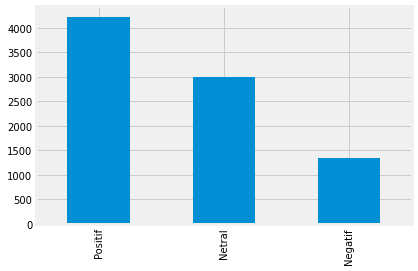

In [ ]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)

In [ ]:
tweet_df.drop(tweet_df.columns[[0,1]], axis=1, inplace=True)
data = pd.read_csv('data_clean_twitter.csv')
data['key'] = np.arange(data.index.stop)
tweet_df ['key'] = np.arange(tweet_df.index.stop)
klasifikasi_df = pd.merge(data, tweet_df, on='key', how='inner')
klasifikasi_df.drop('key', axis=1, inplace=True)

In [ ]:
klasifikasi_df = klasifikasi_df[klasifikasi_df.Sentiments != 'Netral']
klasifikasi_df.reset_index(drop=True, inplace=True)

In [ ]:
s_1 = klasifikasi_df[klasifikasi_df['Sentiments']=='Positif'].sample(1000, replace=True)
s_2 = klasifikasi_df[klasifikasi_df['Sentiments']=='Negatif'].sample(1000, replace=True)
klasifikasi_df = pd.concat([s_1,s_2])

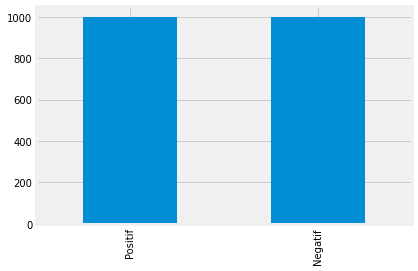

In [ ]:
s = pd.value_counts(klasifikasi_df['Sentiments'])
ax = s.plot.bar()
n = len(klasifikasi_df.index)

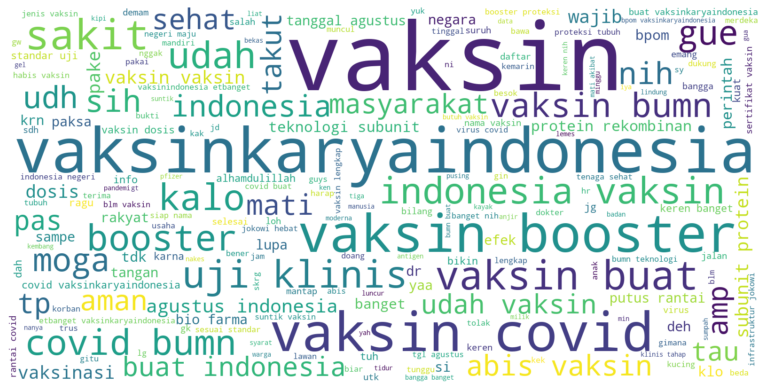

In [ ]:
allWords = ' '.join([tweet for tweet in klasifikasi_df['TextTweet']])
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(allWords)
fig = plt.figure(figsize = (12,10), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

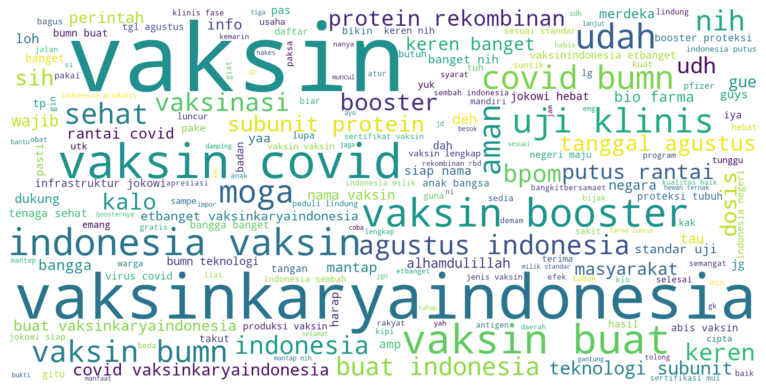

In [ ]:
#kata dengan sentiment positif
kata_positif = ' '.join([tweet for tweet in klasifikasi_df['TextTweet'][klasifikasi_df.Sentiments == 'Positif']])
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(kata_positif)
fig = plt.figure(figsize = (12,10), facecolor=None)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

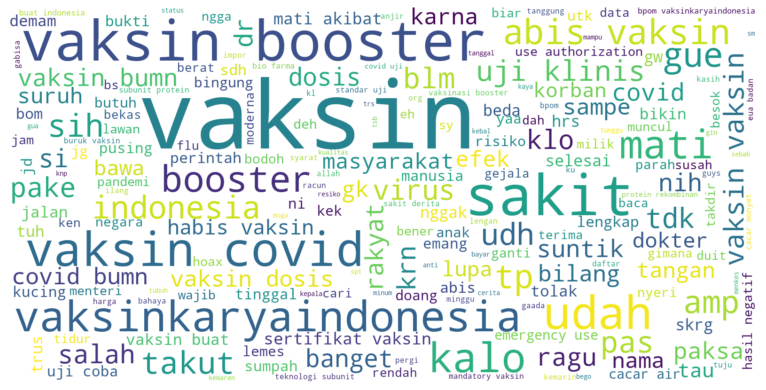

In [ ]:
#kata dengan sentiment negatif
kata_negatif = ' '.join([tweet for tweet in klasifikasi_df['TextTweet'][klasifikasi_df.Sentiments == 'Negatif']])
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(kata_negatif)
fig = plt.figure(figsize = (12,10), facecolor=None)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
klasifikasi_df.to_csv('data_klasifikasi_tweet.csv', encoding='utf8', index=False)
klasifikasi_df

,TextTweet,Sentiments
4338,main real madrid cita cita alas rela vaksin su...,Positif
3296,tgl agustus indonesia buat vaksin keren banget...,Positif
4826,bpom terbit factsheet acu tenaga sehat informa...,Positif
979,yah muncul deh efek vaksin,Positif
4196,presiden joko widodo siap nama vaksin covid bu...,Positif
...,...,...
1513,lupa booster dah senin tp golcha comeback sibu...,Negatif
1136,vaksin gimana takut banget,Negatif
3147,vaksin lndonesia sigap sehat masyarakat hindar...,Negatif
2659,ragu vaksin bumn nih vaksin bumn sesuai uji kl...,Negatif


## **Pemodelan Data**

### Naive Bayes

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [ ]:
y = klasifikasi_df['Sentiments']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(klasifikasi_df['TextTweet'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
pred=NB_classifier .predict(X_test)
metrics.accuracy_score(y_test, pred)

0.855

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

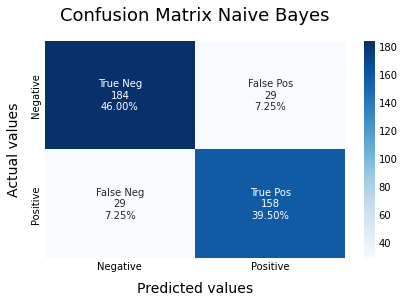

In [ ]:
#Prediciting the test results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix Naive Bayes", fontdict = {'size':18}, pad = 20)

In [ ]:
#Classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

     Negatif       0.86      0.86      0.86       213
     Positif       0.84      0.84      0.84       187

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



### Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)
predsvm =clf.predict(X_test)
metrics.accuracy_score(y_test, predsvm)

0.88

Text(0.5, 1.0, 'Confusion Matrix SVM')

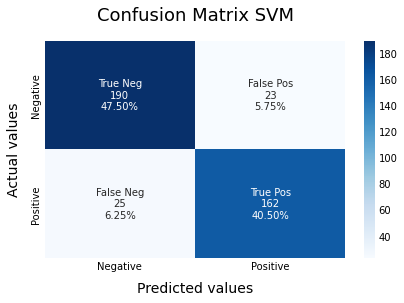

In [ ]:
#Prediciting the test results
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix SVM", fontdict = {'size':18}, pad = 20)

In [ ]:
#Classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

     Negatif       0.88      0.89      0.89       213
     Positif       0.88      0.87      0.87       187

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
import string, re

def cleansing(data):
  data=data.lower()

  remove = string.punctuation
  translator = data.maketrans(remove, ' '*len(remove))
  data = data.translate(translator)

  data = data.encode('ascii', 'ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'',data)

  data = data.replace('\n', ' ')

  return data


def preprocess_data(data):
  data = cleansing(data)
  
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  data = stemmer.stem(data)

  data = vectorizer.transform([data])

  return data

In [ ]:
tweet_positif = 'vaksin membuat kebal dari covid-19'
tweet_negatif = 'setelah vaksin, badan menjadi sakit'

In [ ]:
clf.predict(preprocess_data(tweet_positif))

array(['Positif'], dtype=object)

In [ ]:
clf.predict(preprocess_data(tweet_negatif))

array(['Negatif'], dtype=object)